# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [3]:
pyber_data_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
type_driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
type_driver_count

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
type_fare_total = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fare_total

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
type_avg_fare_ride = type_fare_total / type_ride_count
type_avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
type_avg_fare_driver = type_fare_total / type_driver_count
type_avg_fare_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides" : pd.to_numeric(type_ride_count),
    "Total Drivers" : pd.to_numeric(type_driver_count),
    "Total Fares" : pd.to_numeric(type_fare_total),
    "Average Fare per Ride" : pd.to_numeric(type_avg_fare_ride),
    "Average Fare per Driver" : pd.to_numeric(type_avg_fare_driver)
})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [10]:
pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [12]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pd.to_numeric(pyber_summary_df["Total Rides"]).map("{:,}".format)
pyber_summary_df["Total Drivers"] = pd.to_numeric(pyber_summary_df["Total Drivers"]).map("{:,}".format)
pyber_summary_df["Total Fares"] = pd.to_numeric(pyber_summary_df["Total Fares"]).map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pd.to_numeric(pyber_summary_df["Average Fare per Ride"]).map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pd.to_numeric(pyber_summary_df["Average Fare per Driver"]).map("${:,.2f}".format)

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
city_fare_df = pyber_data_df.groupby(["type", pd.to_datetime(pyber_data_df["date"]).dt.date]).sum()["fare"]
city_fare_df.head()

type   date      
Rural  2019-01-01    43.69
       2019-01-02    52.12
       2019-01-03    19.90
       2019-01-04    24.88
       2019-01-06    47.33
Name: fare, dtype: float64

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
city_fare_df = city_fare_df.reset_index()
city_fare_df.head()

,type,date,fare
0,Rural,2019-01-01,43.69
1,Rural,2019-01-02,52.12
2,Rural,2019-01-03,19.90
3,Rural,2019-01-04,24.88
4,Rural,2019-01-06,47.33


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
city_fare_df.pivot(index="date", columns="type", values="fare")

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [17]:
city_fare_df.dtypes

type     object
date     object
fare    float64
dtype: object

In [18]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
city_fare_pivot_df = city_fare_df.pivot(index="date", columns="type", values="fare")

# Convert index to datetime from object type
city_fare_pivot_df.index = pd.to_datetime(city_fare_pivot_df.index)
city_fare_jan_apr_df = city_fare_pivot_df.loc['2019-01-01':'2019-04-29', :]

In [19]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
city_fare_jan_apr_df.index = pd.to_datetime(city_fare_jan_apr_df.index)
city_fare_jan_apr_df.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98
2019-04-27,52.34,268.25,367.30
2019-04-28,NaN,188.71,328.78
2019-04-29,67.60,167.92,342.63


In [20]:
# 7. Check that the datatype for the index is datetime using df.info()
city_fare_jan_apr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2019-01-01 to 2019-04-29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     74 non-null     float64
 1   Suburban  118 non-null    float64
 2   Urban     119 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [30]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_city_fare_jan_apr_df = city_fare_jan_apr_df.resample("W").sum()
weekly_city_fare_jan_apr_df.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29
2019-05-05,67.60,167.92,342.63


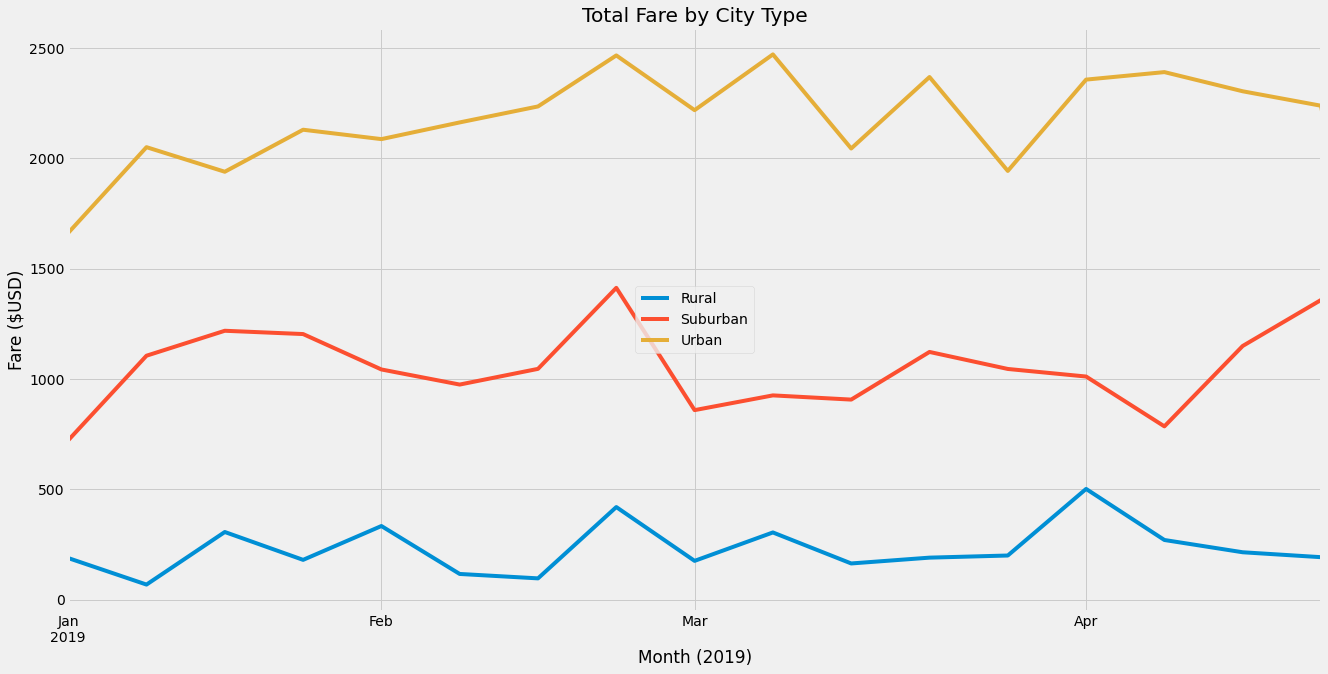

In [47]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Add the line graphs
weekly_fares = city_fare_jan_apr_df.plot(figsize=(20, 10))

# Add title 
weekly_fares.set_title("Total Fare by City Type")
#  Add x- and y-axis labels.
weekly_fares.set_xlabel("Month (2019)")
weekly_fares.set_ylabel("Fare ($USD)")

# Set x-limit to exclude May data point. For some reason, creating a new dataframe using the loc
# method to a new variable did not update the dataframe to end at 2019-04-29
weekly_fares.set_xlim(np.array([0, -1])+weekly_fares.get_xlim())

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Change location of legend
plt.legend(loc="center")

# Save the figure.
plt.savefig("Analysis/total_fare_by_city_type.png")

plt.show()